> TOC
```
Step 1. 데이터 불러오기
Step 2. 시각화
     2-1. 기본 선 그래프
     2-2. 그래프 채우기
     2-3. 산점도
     2-4. 기준선 및 구간 표시
     2-5. 타이틀 표기
Step 3. 장/단기 추세
     3-1. 3일 이동평균
     3-2. 30일 이동평균
Step 4. 시계열 분해
     4-1. 장기 주가데이터
     4-2. 단기 주가데이터
     4-3. 장기 로그 주가데이터
     4-4. 장기 로그차분 주가데이터
Step 5. 자기상관분석
     5-1. 기본 종가 데이터
     5-2. 로그 데이터
     5-3. 로그차분 데이터
```

## Step 1. 데이터 불러오기

In [2]:
import pandas as pd
import yfinance as yf

In [3]:
# 이전 실습에서는 yf.Tickers() 함수를 사용했습니다.
# 이번에는 한 종목만 분석할 것이므로,
# 단일 티커만 로드하는 yf.Ticker() 함수를 사용합니다.
stocks = yf.Ticker('TSLA')

In [4]:
df = stocks.history(start='2010-01-01', end='2022-07-08')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2022-06-30,673.530029,688.369995,656.590027,673.419983,31533500,0,0.0
2022-07-01,681.000000,690.690002,666.359985,681.789978,24781500,0,0.0
2022-07-05,669.000000,699.440002,648.500000,699.200012,28193700,0,0.0


## Step 2. 시각화

파이썬에서 사용하는 대표적인 시각화 라이브러리는 `matplotlib`과 `seaborn`
- `matplotlib`은 그래프 사이트를 비롯해 다양한 차트를 편하게 그릴 수 있도록 함
- `seaborn`은 `matplotlib`을 기반으로 통계 분석을 위해 더 다양한 색상 테마와 통계 차트 제공

### 2-1. 기본 선 그래프

> [(참고) matplotlib Github](https://github.com/matplotlib/matplotlib)

In [5]:
# matplotlib
import matplotlib.pyplot as plt
# 시각화 스타일 적용
plt.style.use('seaborn')

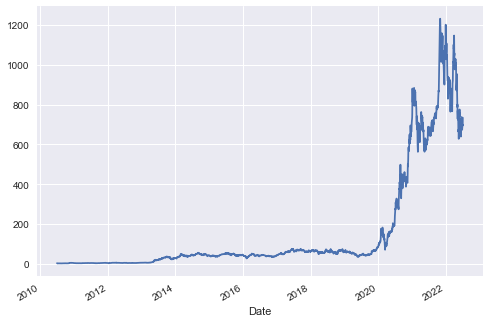

In [6]:
# df 데이터프레임은 '시간'축을 인덱스로 가지고 있고 
# 시가, 종가, 거래량 등을 변수(컬럼)들로 가지고 있다.
# 보통, 시계열 그래프는 시간축을 x로 두고 분석 대상 변수를 y축으로 둔다.
# 여기서는 종가 하나에 대해 그려본다.
df['Close'].plot()
plt.show()

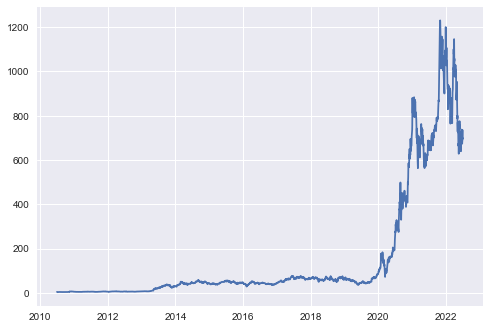

In [7]:
# 위 코드와 정확히 동일한 기능을 하는 다른 방식의 코드
plt.plot(df['Close'])
plt.show()

### 2-2. 그래프 채우기

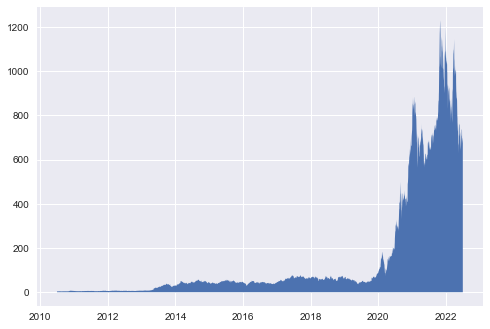

In [8]:
# 일관성을 위해 데이터프레임 내장 함수보다는 plt 패키지를 사용하는 것을 사용하는 것을 권장하는데, 
# 더 다양한 함수, 기능을 제공하기 때문이다.
# 예를 들면, fill_between 함수를 사용해 다르게 선 아래를 채워주는 스타일도 그릴 수 있다.
# fill_between은 y값을 y1과 y2로 나눠 받아 y1~y2 사이의 영역을 색칠해준다. 
# y2는 default 0으로 설정되어 있다.
plt.fill_between(x=df.index, y1=df['Close']) 
plt.show()

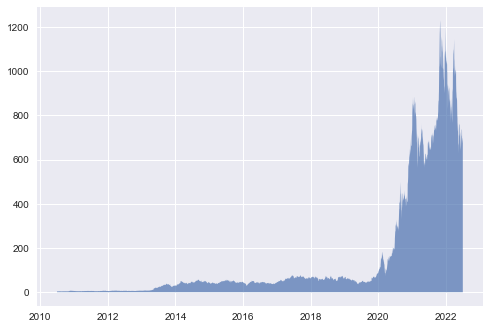

In [9]:
# 색상 농도는 alpha로 조정한다.
plt.fill_between(x=df.index, y1=df['Close'], alpha=0.7) 
plt.show()

### 2-3. 산점도

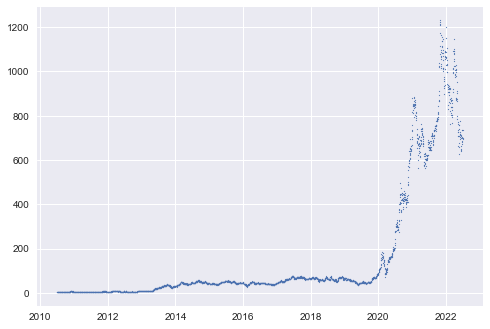

In [10]:
# 산점도는 scatter 함수를 사용한다. 점의 크기는 s로 지정할 수 있다.
plt.scatter(x=df.index, y=df['Close'], s=0.8)
plt.show()

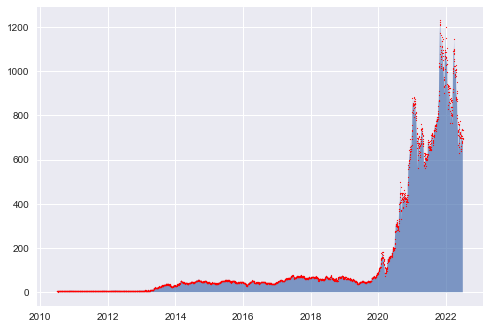

In [11]:
# 산점도와 영역을 함께 그릴수도 있다.
# 색상은 c로 지정한다.
plt.fill_between(x=df.index, y1=df['Close'], alpha=0.7)
plt.scatter(x=df.index, y=df['Close'], s=0.8, c='r')
plt.show()

### 2-4. 기준선 및 구간 표시

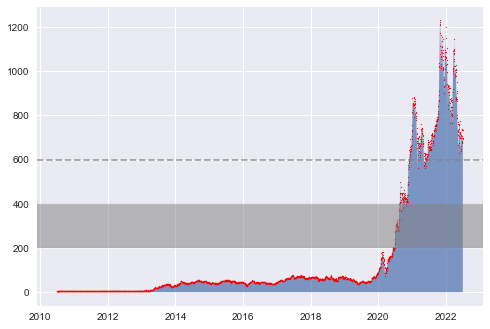

In [12]:
# 만약 특정 y값에 기준선을 그리고 싶다면 axhline 함수를 사용하고,
# 특정 y값 구간에 영역을 표시하고 싶다면 axhspan 함수를 사용한다.

plt.fill_between(x=df.index, y1=df['Close'], alpha=0.7)
plt.scatter(x=df.index, y=df['Close'], s=0.8, c='r')

# 색상은 마찬가지로 c로 적용하고, 선의 농도는 alpha로 적용할 수 있다.
# 선의 스타일은 linestyle 파라미터를 사용한다.
plt.axhline(y=600, c='grey', linestyle='--', alpha=0.7)

# axhspan의 경우 색상은 c가 아니라 color로 지정해야 한다.
plt.axhspan(ymin=200, ymax=400, color='grey', alpha=0.5)
plt.show()

### 2-5. 타이틀 표기

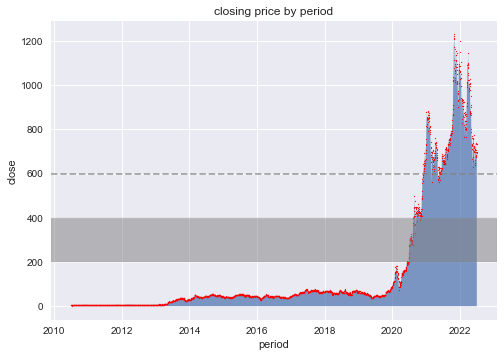

In [13]:
# y축과 x축, 그리고 표 전체의 이름을 정의할 수 있다.

plt.fill_between(x=df.index, y1=df['Close'], alpha=0.7)
plt.scatter(x=df.index, y=df['Close'], s=0.8, c='r')

plt.axhline(y=600, c='grey', linestyle='--', alpha=0.7)
plt.axhspan(ymin=200, ymax=400, color='grey', alpha=0.5)

plt.xlabel('period')
plt.ylabel('close')
plt.title('closing price by period')

plt.show()

## Step 3. 장/단기 추세

### 3-1. 3일 이동평균

In [18]:
df['Close'].rolling(3)

Rolling [window=3,center=False,axis=0,method=single]

In [45]:
# ex. 3일 이동 평균
df['Close'].rolling(3).mean() 

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01      4.645333
2010-07-02      4.332667
2010-07-06      3.818000
                 ...    
2022-06-30    685.626648
2022-07-01    680.226644
2022-07-05    684.803324
2022-07-06    692.063334
2022-07-07    709.343343
Name: Close, Length: 3027, dtype: float64

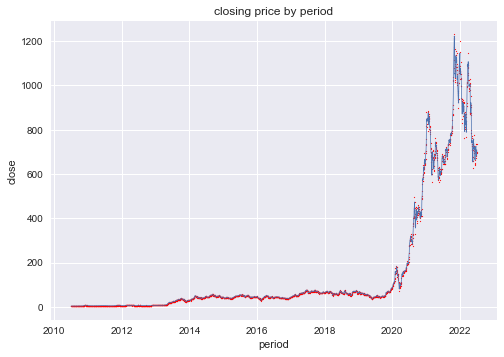

In [49]:
plt.scatter(x=df.index, y=df['Close'], s=0.8, c='r')

# 선의 굵기는 linewidth를 통해 조절합니다.
plt.plot(df['Close'].rolling(3).mean(), linewidth=0.7)

plt.xlabel('period')
plt.ylabel('close')
plt.title('closing price by period')

plt.show()

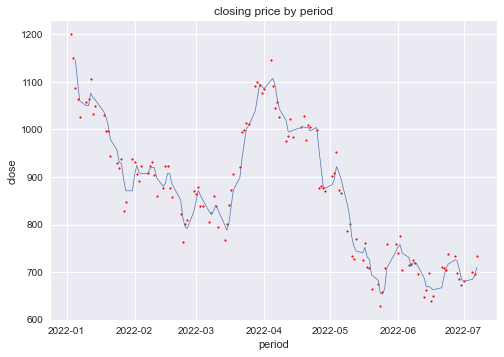

In [56]:
# 버전 변화에 따른 경고문이 출력될 것이므로 아래 함수를 실행해줍니다.
import warnings
warnings.filterwarnings(action='ignore')

# 잘 보이지 않으니, 특정 기간(2022년)만 살펴봅니다.
df_2022 = df['2022'].copy()

plt.scatter(x=df_2022.index, y=df_2022['Close'], s=3, c='r')

# 선의 굵기는 linewidth를 통해 조절합니다.
plt.plot(df_2022['Close'].rolling(3).mean(), linewidth=0.7)

plt.xlabel('period')
plt.ylabel('close')
plt.title('closing price by period')

plt.show()

### 3-2. 30일 이동평균

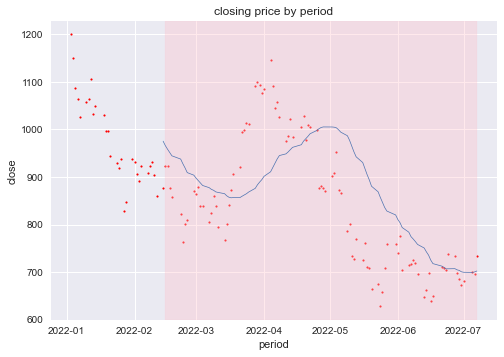

In [70]:
# 3일 이동평균선은 상대적으로 단기 추세를 보여줍니다.
# 한달 단위의 추세를 보고싶다면 rolling(30)으로 적용해주면 됩니다.

plt.scatter(x=df_2022.index, y=df_2022['Close'], s=3, c='r')

# 참고로, 지난 30일의 평균을 계산하므로 당연히 앞쪽 30일간의 추세는 그려지지 않습니다.
plt.plot(df_2022['Close'].rolling(30).mean(), linewidth=0.7)

# 추세가 그려지는 구간을 x좌표로 표시하고 싶다면 axhspan과 유사하게 axvspan 함수를 사용합니다.
# 30일째부터 표시할 것이므로,   
# 인덱싱을 통해 xmin df_2022 종가의 30번째 값부터 마지막 값까지 기간을 표시합니다.
plt.axvspan(xmin=df_2022.index[30], xmax=df_2022.index[-1], color='pink', alpha=0.35)

plt.xlabel('period')
plt.ylabel('close')
plt.title('closing price by period')

plt.show()

## Step 4. 시계열 분해
- 그러나 추세는 측정 기간에 따라 급격히 변할 수 있기 때문에,
- 추세만으로 향후 데이터의 움직임을 예측하는 것은 무리가 있습니다.
- 따라서 유의미하게 드러나는 반복 패턴과 시기별 특성을 확인할 필요가 있습니다.

### 4-1. 장기간-기본주가

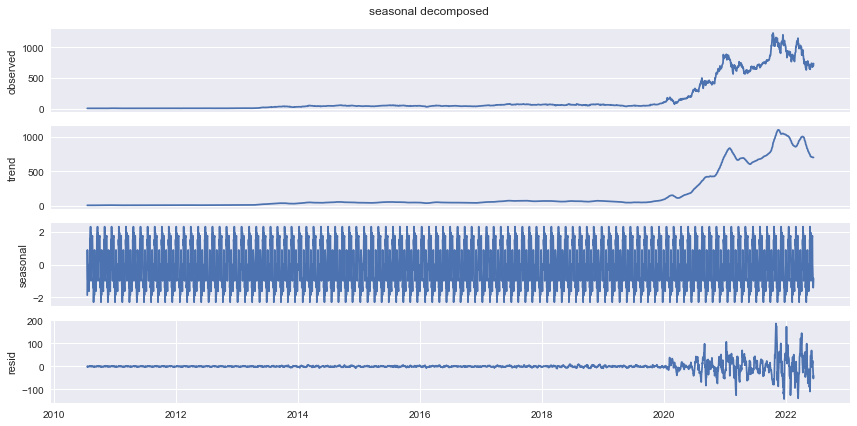

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(df['Close'], freq=30)

plt.figure(figsize=(12,6))

plt.subplot(411)
plt.xticks([])
plt.ylabel('observed')
plt.plot(res.observed)

plt.subplot(412)
plt.xticks([])
plt.ylabel('trend')
plt.plot(res.trend)

plt.subplot(413)
plt.xticks([])
plt.ylabel('seasonal')
plt.plot(res.seasonal)

plt.subplot(414)
plt.ylabel('resid')
plt.plot(res.resid)

# 전체 그래프에 대한 타이틀은 suptitle로 설정합니다.
plt.suptitle('seasonal decomposed')
# 퍼져있는 그래프간 간격을 타이트하게 잡아줍니다.
plt.tight_layout()
plt.show()

- trend는 30일 이동평균을 보여주고 있고,
- seasonal은 관측치(observed)에서 추세(trend)를 제거하고 남은 값의 반복되는 패턴을 보여줍니다.
- resid는 반복 패턴(seasonal)까지 제거한, 무작위적 변동성입니다.

위 데이터에서 특이한 점은 2020년 이전과 이후, 2022년 이전과 이후 resid가 모두 다른 양상을 보인다는 것입니다.
- 시계열 데이터에서 이러한 현상이 있다면 '그때와 지금은 다르다'라고 판단해야 합니다.
- 서로 다른 특성과 패턴을 보이는 기간들을 전체 기간으로 묶어서 추세와 계절성을 덜어내는 경우,
- 이렇게 잔차의 움직임이 크게 바뀌게 됩니다. 정말 '무작위적' 잔차라면, 특정 범위 내에서 움직임을 보여야 합니다.
- 진폭이 커지는 것도 잔차에서는 허용되지 않는 '패턴'의 일종입니다.

### 4-2. 단기간-기본주가

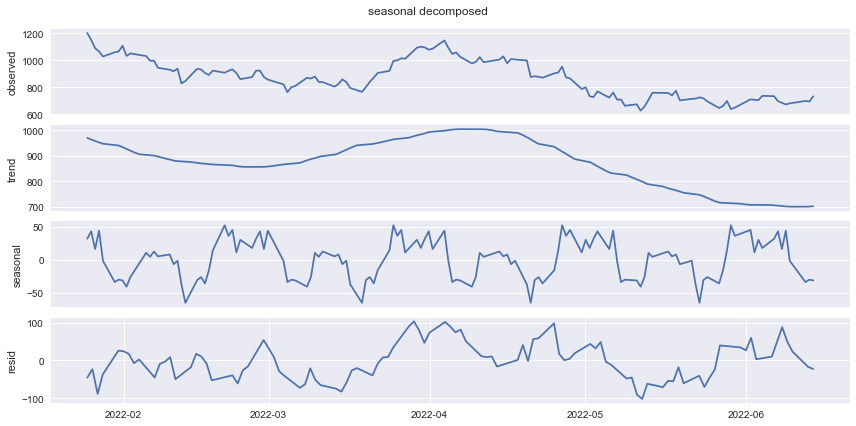

In [88]:
# 2022년 이후 데이터만 분해해봅니다.
res = seasonal_decompose(df_2022['Close'], freq=30)

plt.figure(figsize=(12,6))

plt.subplot(411)
plt.xticks([])
plt.ylabel('observed')
plt.plot(res.observed)

plt.subplot(412)
plt.xticks([])
plt.ylabel('trend')
plt.plot(res.trend)

plt.subplot(413)
plt.xticks([])
plt.ylabel('seasonal')
plt.plot(res.seasonal)

plt.subplot(414)
plt.ylabel('resid')
plt.plot(res.resid)

# 전체 그래프에 대한 타이틀은 suptitle로 설정합니다.
plt.suptitle('seasonal decomposed')
# 퍼져있는 그래프간 간격을 타이트하게 잡아줍니다.
plt.tight_layout()
plt.show()

- 이렇게 데이터 구간을 좁히게 되면 데이터가 너무 적어진다는 문제가 발생합니다.
- 잔차가 정말 무작위성을 띄는지 확인할 수 있는 만큼의 충분한 데이터 확보가 어렵습니다.

### 4-3. 장기간-로그 주가

그래서 일반적으로 주가 분석을 할 때에는 로그를 취해준 값을 분석합니다.
- 로그를 취하면 y값(Close)의 차이를 줄여주게 되는데,
- 급격한 추세로 인해 가파르게 상승하거나 하락하는 구간을 희석시키는 역할을 합니다.


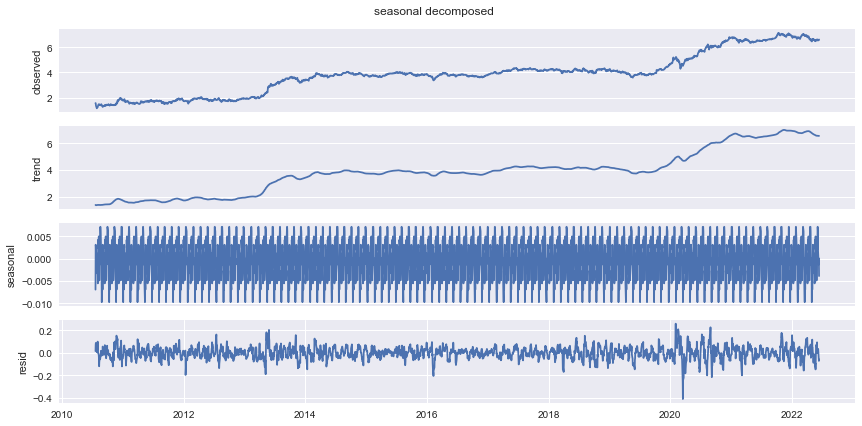

In [104]:
import numpy as np

res = seasonal_decompose(np.log(df['Close']),freq=30)

plt.figure(figsize=(12,6))

plt.subplot(411)
plt.xticks([])
plt.ylabel('observed')
plt.plot(res.observed)

plt.subplot(412)
plt.xticks([])
plt.ylabel('trend')
plt.plot(res.trend)

plt.subplot(413)
plt.xticks([])
plt.ylabel('seasonal')
plt.plot(res.seasonal)

plt.subplot(414)
plt.ylabel('resid')
plt.plot(res.resid)

# 전체 그래프에 대한 타이틀은 suptitle로 설정합니다.
plt.suptitle('seasonal decomposed')
# 퍼져있는 그래프간 간격을 타이트하게 잡아줍니다.
plt.tight_layout()
plt.show()

### 4-4. 장기간-로그차분 주가

로그를 취한 값에서 미분을 한번 더 적용해주기도 합니다.(로그차분)
- 그러면, 데이터 진폭을 줄인 효과에 더해 단순히 종가가 아니라 일간 변화량을 보여주게 됩니다.
- 만약, 현재 주가가 과거보다 훨씬 많이 올라있는 상태라면 과거의 1%보다 현재의 1%가 더 큰 영향을 미치는데,
- 단순 종가가 아니라 미분을 통한 '변화량'을 y값으로 두게 되면 과거와 현재의 움직임을 동일한 기준으로 판단할 수 있게 됩니다.

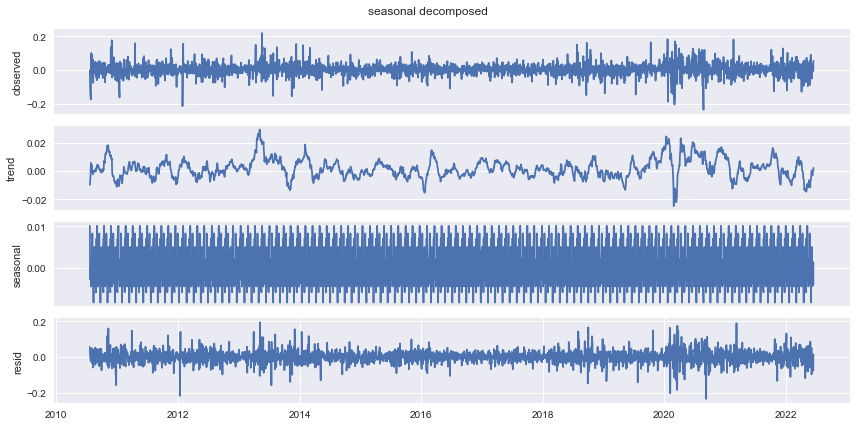

In [105]:
import numpy as np

res = seasonal_decompose(np.log(df['Close']).diff().dropna(), freq=30)

plt.figure(figsize=(12,6))

plt.subplot(411)
plt.xticks([])
plt.ylabel('observed')
plt.plot(res.observed)

plt.subplot(412)
plt.xticks([])
plt.ylabel('trend')
plt.plot(res.trend)

plt.subplot(413)
plt.xticks([])
plt.ylabel('seasonal')
plt.plot(res.seasonal)

plt.subplot(414)
plt.ylabel('resid')
plt.plot(res.resid)

# 전체 그래프에 대한 타이틀은 suptitle로 설정합니다.
plt.suptitle('seasonal decomposed')
# 퍼져있는 그래프간 간격을 타이트하게 잡아줍니다.
plt.tight_layout()
plt.show()

하지만 이렇게 변화량으로 보면 추세가 사라져있습니다. 우리의 눈으로 패턴을 발견하기 어렵고, 마치 관측치가 잔차처럼 보이는 현상이 나타납니다.
- 이 결과를 두고, '일일 주가 변화량은 예측할 수 없다'라고 하기도 합니다.
- 반면, 로그만 취했던 데이터를 보면 장기 추세는 우상향하는 움직임이 나타나는데, 이것을 두고는 '추세는 장기적으로만 유의미하다'라고도 해석합니다.

이 현상은 자기상관분석을 통해서도 검증할 수 있습니다.

## Step 5. 자기상관분석

### 5-1. 기본 종가(Close)

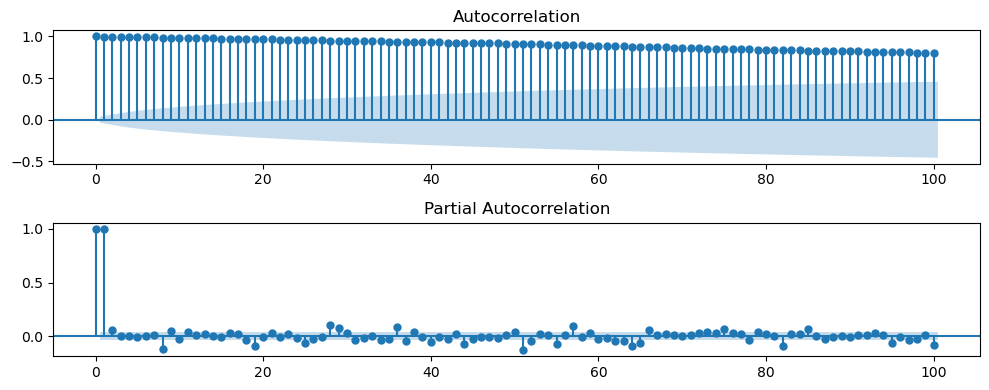

In [154]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('default')

# plot_acf는 실행될때마다 내부적으로 그래프를 그려버리기 때문에,
# 위에서 작성했던 방식으로는 subplot들로 묶어서 보여주기 까다롭습니다.
# 따라서 아래와 같이 fig 객체를 생성하여 ax 파라미터를 통해 위치 정보를 넘겨주는 방식을 사용합니다.
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(211)
plot_acf(df['Close'], lags=100, ax=ax1) 

ax2 = fig.add_subplot(212)
plot_pacf(df['Close'], lags=100, ax=ax2)

plt.tight_layout()

- autocorrelation은 자기상관성입니다. 오늘과 어제, 어제와 그저께의 연관성을 이어서 보여줍니다.
- partial autocorrelation은 '편'자기상관성입니다. 편자기상관성은 오늘 가격이 전날 가격, 그 전날 가격으로부터 얼마나 영향을 받는가에 대한 수치를 보여줍니다.
- 주가의 자기상관성은 매우 강하며(1에 가까울수록 상관관계가 높습니다),
- 그 영향은 바로 전날에 대해서만 받습니다.
- 즉, 오늘의 가격은 어제 가격으로부터는 영향을 받지만 그 전날 가격과는 무관합니다.

### 5-2. 로그 

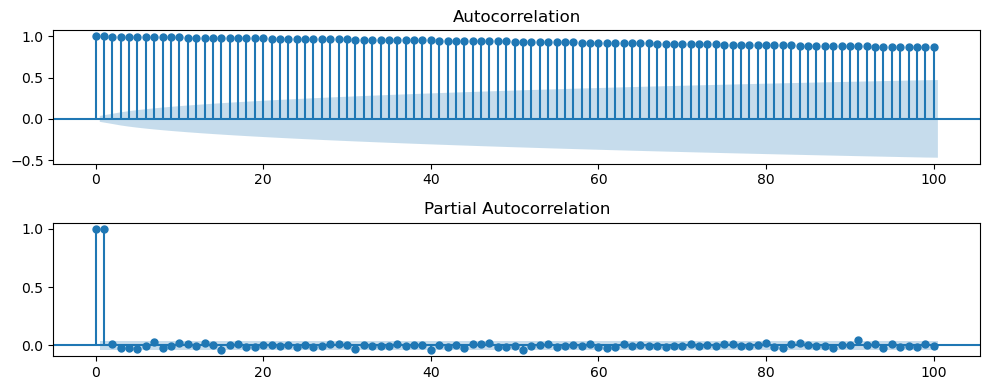

In [152]:
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(211)
plot_acf(np.log(df['Close']), lags=100, ax=ax1) 

ax2 = fig.add_subplot(212)
plot_pacf(np.log(df['Close']), lags=100, ax=ax2)

plt.tight_layout()

로그를 취하면 이 현상은 더 두드러집니다. 급격한 변화가 일부 상쇄되므로, 추세를 잡아내기 더 쉬워지는 것입니다.

### 5-3. 로그차분

- 그러나 차분을 해주자마자 자기상관성은 완전히 사라집니다.
- 하루의 변화량은 그 전날 이후의 변화량과 전혀 무관한 데이터입니다.
- 즉, 내일의 가격 변화는 지금까지의 가격 변화만으로는 예측할 수 없습니다.

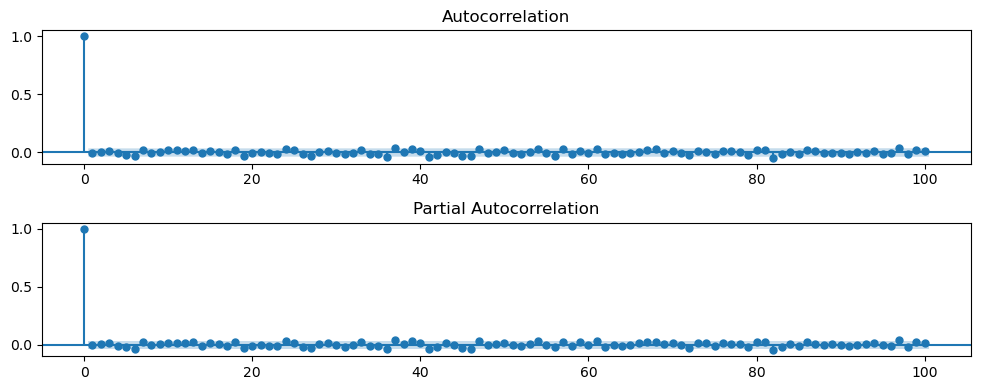

In [156]:
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(211)
plot_acf(np.log(df['Close']).diff().dropna(), lags=100, ax=ax1) 

ax2 = fig.add_subplot(212)
plot_pacf(np.log(df['Close']).diff().dropna(), lags=100, ax=ax2)

plt.tight_layout()